In [50]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
np.set_printoptions(threshold=np.inf)

In [51]:
def H_cavity(N, wr):
    return Qobj(sc.hbar * wr * create(2*N + 1) * destroy(2*N +1))

def H_drive(N):
    return Qobj(create(2*N + 1) + destroy(2*N + 1))

def drive_coeff(t, args):
    wd = args["wd"]
    A = args["A"]

    return A * np.cos(wd * t)

def Hamiltonian(N, wr, A):
    return Qobj(sc.hbar * wr * create(2* N + 1) * destroy(2*N + 1) + A*(create(2*N + 1) + destroy(2*N + 1)))


In [75]:
N = 10
wr = 0.05
wd =0.05
A = 10
Points = 10000
t = np.linspace(0, 1000, Points)

-78.4938289511383


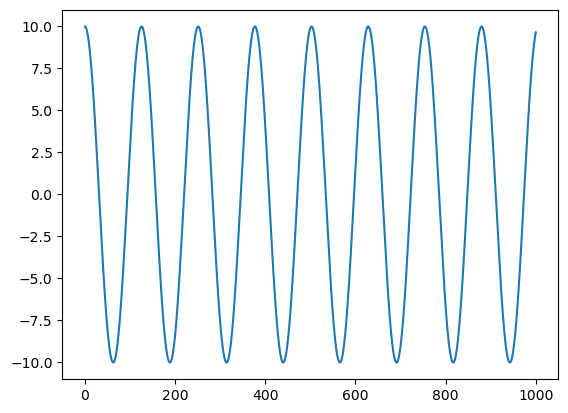

In [78]:
evals, ekets = Hamiltonian(N, wr, A).eigenstates()

Htot = [H_cavity(N, wr), [H_drive(N), drive_coeff]]

print(evals[0])
psi0=ekets[0]


output = sesolve(Htot, psi0, t, args={'wd': wd, 'A': A})

plt.plot(t, drive_coeff(t, args={'wd': wd, 'A': A}))
plt.show()

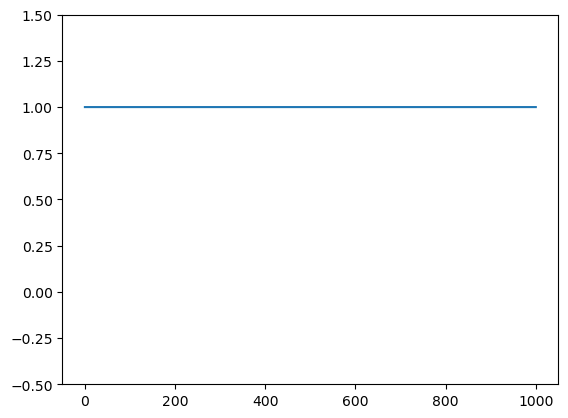

In [92]:

Ovrlp = np.empty(Points)


for n in range(0,Points):
    # overlap of the output to the initial state

    Ovrlp[n]=output.states[n].norm()
    
plt.ylim(-0.5, 1.5)
plt.plot(t, Ovrlp)

plt.show()